In [1]:
"""
Plotta_data.py

Syfte:
    Kör en agentbaserad SIR-modell för mässling vid olika vaccinationsgrader och visar hur populationen utvecklas över tid.

Input:
    Inga externa inputs via parametrar. Modellparametrar anges direkt i filen:
        - N: antal agenter
        - width, height: area
        - initial_infected: antal infekterade vid start
        - vaccination_rate: vaccinationsgrad
        - mortality_rate: dödlighet
        - timesteps: antal tidssteg 

Output:
    - Grafer över S, I, R och D
    - Plottar Re (effektivt reproduktionstal)
    - Utskrift av resultat för varje simulering
"""

import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt

In [ ]:
#Modellparametrar
N = 100000
width = 140
height = 70
initial_infected = 1
mortality_rate = 0.0021
timesteps = 100

## Vaccination rate: 50% (Lägre än IDAHO)

In [2]:
#Vaccinationsgrad 50%
vaccination_rate = 0.5

#Skapar modell med valda parametrar
model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

#Listor för att separera data över tid. En lista per tillstånd S, I, R, D.
S_history = []
I_history = []
R_history = []
D_history = []

# Kör modellen ett tidssteg i  och sparar antal agenter i varje kategori S, I, R eller D
for t in range(timesteps):
    model.step()
    S_history.append(model.count_status("S"))
    I_history.append(model.count_status("I"))
    R_history.append(model.count_status("R"))
    D_history.append(model.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model.count_status("S"))
print("I:", model.count_status("I"))
print("R:", model.count_status("R"))
print("D:", model.count_status("D"))



S: 10
I: 0
R: 98971
D: 1019


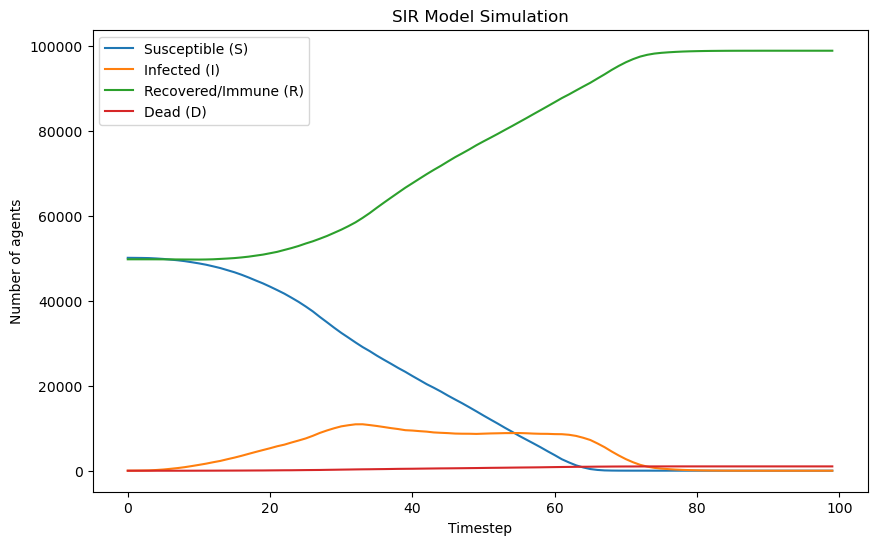

In [3]:
#SIRD-graf som plottar alla tillstånd i samma graf

plt.figure(figsize=(10,6))
plt.plot(S_history, label="Susceptible (S)")
plt.plot(I_history, label="Infected (I)")
plt.plot(R_history, label="Recovered/Immune (R)")
plt.plot(D_history, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()


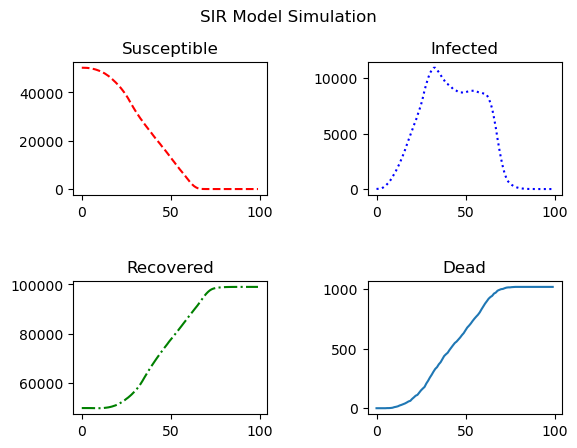

In [4]:
#Subplots med en graf per tillstånd. En för vardera S, I, R, D.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [5]:
#Beräkning av Re:

# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
secondary = {}
for event in model.infection_log: #går igenom alla smittningar
    inf = event["infector_id"]
    if inf is not None:
        secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet av hur många varje smittad smittar = Re
Re = sum(secondary.values()) / len(secondary) if secondary else 0 
print("Re =", Re)

Re = 1.9156259778681763


In [6]:
#Hämtar data från datacollector
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

In [7]:
agent_df.head() #Visar xempel på agentdata

Agent status Agent position  New Infected
Step AgentID                                          
1    0                  I       (51, 58)             0
     1                  S       (56, 44)             0
     2                  R       (40, 59)             0
     3                  R        (80, 4)             0
     4                  R      (115, 24)             0

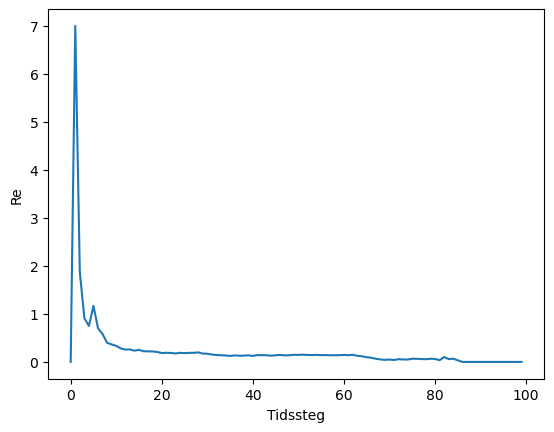

In [8]:
#Plottar Re över tid

plt.plot(model_df)

plt.xlabel("Tidssteg")
plt.ylabel("Re")
plt.show()

## Vaccination rate: 78.% (IDAHO)

In [9]:
#Ny simulering med 78% vaccinationsgrad

vaccination_rate_2 = 0.785

model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

S_history_2 = []
I_history_2 = []
R_history_2 = []
D_history_2 = []

#Kör simupleringen
for t in range(timesteps):
    model_2.step()
    S_history_2.append(model_2.count_status("S"))
    I_history_2.append(model_2.count_status("I"))
    R_history_2.append(model_2.count_status("R"))
    D_history_2.append(model_2.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model_2.count_status("S"))
print("I:", model_2.count_status("I"))
print("R:", model_2.count_status("R"))
print("D:", model_2.count_status("D"))


S: 3265
I: 2552
R: 93789
D: 394


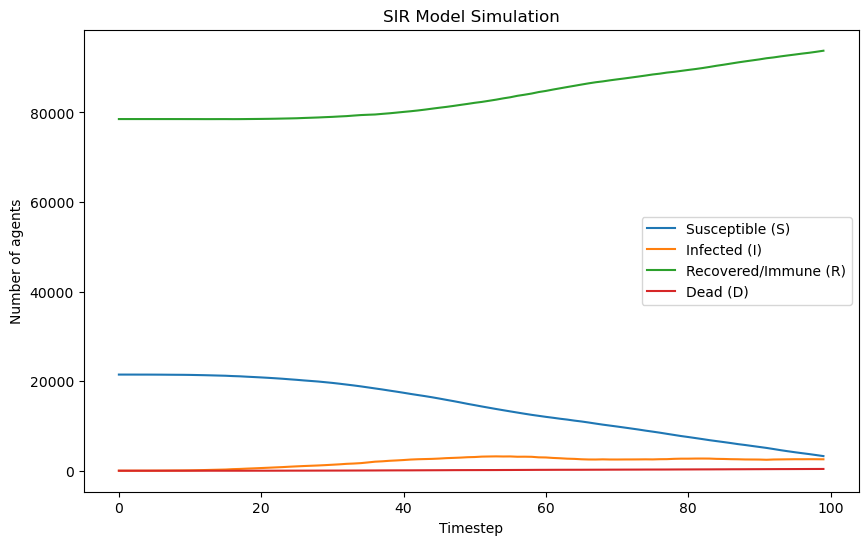

In [10]:
#SIRD-graf som plottar alla tillstånd i en graf

plt.figure(figsize=(10,6))
plt.plot(S_history_2, label="Susceptible (S)")
plt.plot(I_history_2, label="Infected (I)")
plt.plot(R_history_2, label="Recovered/Immune (R)")
plt.plot(D_history_2, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

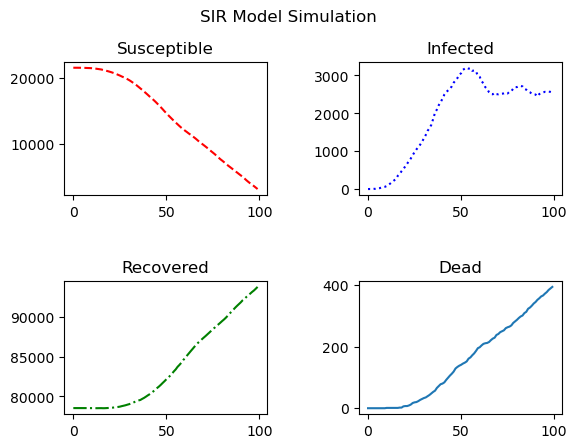

In [11]:
#Sublots, en för varje S, I, R, D.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history_2,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history_2,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history_2,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history_2, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [12]:
#Plottar Re över tid
model_df_2 = model_2.datacollector.get_model_vars_dataframe()
agent_df_2 = model_2.datacollector.get_agent_vars_dataframe()

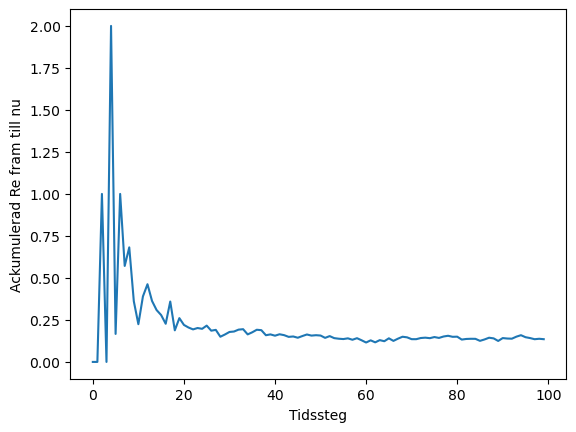

In [13]:
plt.plot(model_df_2)
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

## Vaccination rate: 95 % (önskad vaccinationstäckning)

In [14]:
#Ny simulering med 95% vaccinationsgrad

vaccination_rate_3 = 0.95

model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

S_history_3 = []
I_history_3 = []
R_history_3 = []
D_history_3 = []

for t in range(timesteps):
    model_3.step()
    S_history_3.append(model_3.count_status("S"))
    I_history_3.append(model_3.count_status("I"))
    R_history_3.append(model_3.count_status("R"))
    D_history_3.append(model_3.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model_3.count_status("S"))
print("I:", model_3.count_status("I"))
print("R:", model_3.count_status("R"))
print("D:", model_3.count_status("D"))


S: 5040
I: 0
R: 94960
D: 0


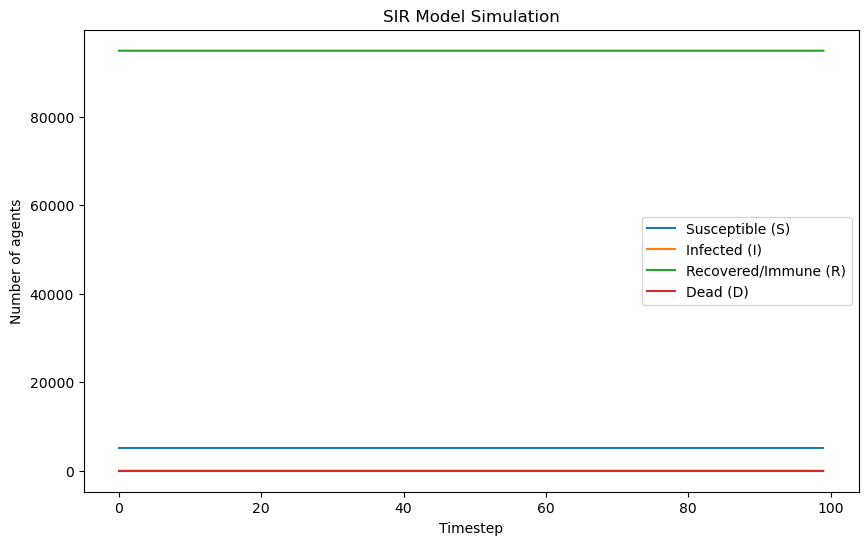

In [15]:
#Plottar SIRD-graf. Alla tillstånd i samma graf.
plt.figure(figsize=(10,6))
plt.plot(S_history_3, label="Susceptible (S)")
plt.plot(I_history_3, label="Infected (I)")
plt.plot(R_history_3, label="Recovered/Immune (R)")
plt.plot(D_history_3, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

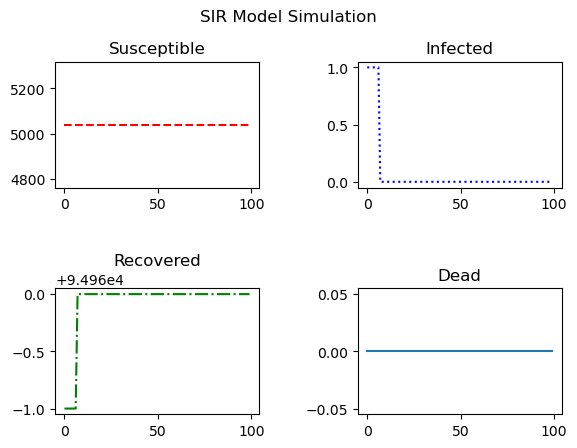

In [16]:
#Subplots. En för varje tillstånd S, I, R, D.

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history_3,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history_3,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history_3,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history_3, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [17]:
#Plottar Re över tid
model_df_3 = model_3.datacollector.get_model_vars_dataframe()
agent_df_3 = model_3.datacollector.get_agent_vars_dataframe()

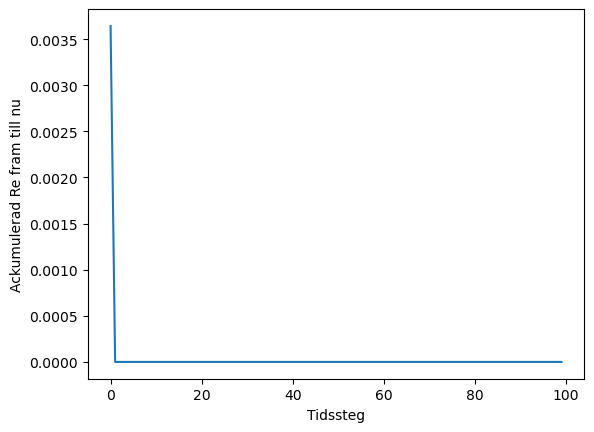

In [18]:
plt.plot(model_df_3)
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()